# Pseudospectral tutorial, part 2
## Les Houches, summer 2017


An easy stroll through pseudospectral methods: solving $\partial_t \zeta + J(\psi, \zeta) = \nu \nabla^4\zeta$, where $\zeta = \nabla^2\psi$.



First load the package for plotting.

In [3]:
using PyPlot

We create the physical grid $x$, $y$ (as in the Differentiation notebook). Also, we create the wavenumber grid.

In [63]:
nx, ny = 64, 64               # number of grid points
Lx, Ly = 2.0*pi, 2.0*pi       # size of the domain in each direction

# constructing the physical grid (x,y)
dx, dy = Lx/nx, Ly/ny
 x = 0:dx:Lx-dx
 y = 0:dy:Ly-dy

X  = zeros(nx,ny)
Y  = zeros(nx,ny)
for j in 1:ny
    for i in 1:nx
         X[i,j] = x[i]
         Y[i,j] = y[j]
    end
end

# constructing the wavenumber grid (k,l)
k  = 2.0*pi/Lx * [0:nx/2; -nx/2+1:-1];
l  = 2.0*pi/Ly * [0:ny/2; -ny/2+1:-1];

k0 = 2.0*pi/Lx            # the fundamental x-wavenumber
l0 = 2.0*pi/Ly            # the fundamental y-wavenumber

kx = zeros(nx,ny)
ky = zeros(nx,ny)
for j in 1:ny
    for i in 1:nx
        kx[i,j] = k[i]
        ky[i,j] = l[j]
    end
end

ksq = kx.^2 + ky.^2

iksq = 1./ksq
iksq[1,1] = 0;

Let's define some parameters.

In [89]:
    nu = 5.0e-7
    dt = 0.02
  tfin = 100
nstep  = Int(tfin/dt) + 1;

t = 0:dt:tfin;

Prescribe an initial condition for $\zeta$ and plot it.

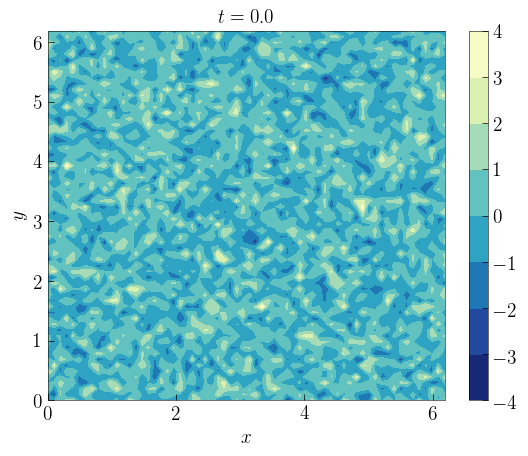

In [91]:
zeta0 = randn(nx, ny)
zh = fft(zeta0)

j=1

time = t[j]
figure(1)
contourf(X,Y,real(ifft(zh)))
xlabel(L"$x$")
ylabel(L"$y$")
title("\$t = $time \$")
draw()
colorbar();

Time-step $\zeta$ forward for $nstep$ times.

In [92]:
for j = 2:nstep
    
    psih   = zh.*iksq
    psih_x = im*kx.*psih
    psih_y = im*ky.*psih
      zh_x = im*kx.*zh
      zh_y = im*ky.*zh
    
     psi_x = real(ifft(psih_x))
     psi_y = real(ifft(psih_y))
    zeta_x = real(ifft(zh_x))
    zeta_y = real(ifft(zh_y))
    
    
    J = psi_x.*zeta_y - psi_y.*zeta_x
    
    rhs = -fft(J) - nu*ksq.^2.*zh
    
    zhnew = zh + dt*rhs
    zh = zhnew
end

Plot the final state.

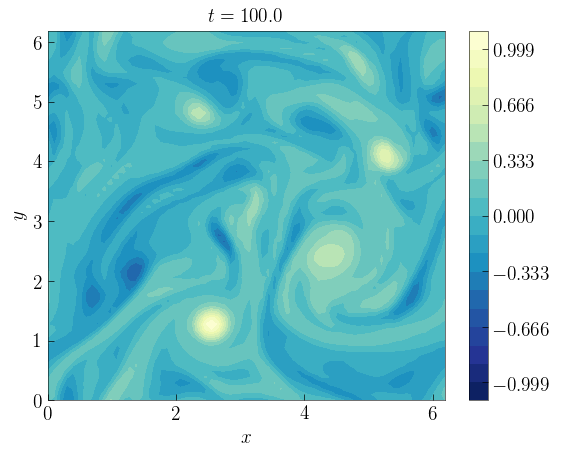

In [97]:
time = t[j]
zeta = real(ifft(zh))
maxz = maximum(abs.(zeta))
levs = linspace(-maxz, maxz, 21)

fig = figure(1)
contourf(X, Y, zeta, levs)
title("\$t = $time \$")
xlabel(L"$x$")
ylabel(L"$y$")
draw()
colorbar();